## 차량파손 데이터 EDA

In [78]:
import os
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageDraw
from PIL import Image

In [3]:
os.getcwd()

'C:\\Users\\SSAFY\\Desktop\\쏘카\\160. 차량파손 이미지 데이터\\01.데이터'

### 데이터 폴더의 최상단기준에서 실행


In [4]:
damage_images = glob('./2.Validation/2.라벨링데이터/damage/*.json')
damage_part_images = glob('./2.Validation/2.라벨링데이터/damage_part/*.json')

In [5]:
damage_df = pd.DataFrame(columns=("index", "Scratched", "Breakage", "Separated", "Crushed", "total_anns", "ran_var", "dataset"))

In [6]:
def cls_damage(data):
    file_name = data['images']['file_name']
    damage_dict = {"index": file_name, "Scratched" : 0, "Breakage" : 0, "Separated" : 0, "Crushed" : 0, "total_anns" : 0,"dataset" : ""}
    _sum = 0
    for i in range(len(data['annotations'])):
        damage_type = data['annotations'][i]['damage']
        damage_dict[damage_type] += 1
        _sum += 1
    damage_dict["total_anns"] = _sum
    return damage_dict

In [8]:
for i in tqdm(range(len(damage_images))):
    img = damage_images[i][2:]
    
    with open(f'./{img}', 'r') as f:
        data = json.load(f)
    damage_dict = cls_damage(data)
    
    if(1 <= i % 10 < 8):
        damage_dict['dataset'] = 'train'
    elif(i % 10 == 8 or i % 10 == 9):
        damage_dict['dataset'] = 'val'
    else:
        damage_dict['dataset'] = 'test'
    
    damage_df.loc[i] = damage_dict
damage_df.loc["총합", :] = damage_df.sum(axis = 0, numeric_only = True)

100%|███████████████████████████████████████████████████████████████████████████| 50445/50445 [03:40<00:00, 228.28it/s]


In [9]:
# dfframe셀 실수 -> 정수변경
damage_df = damage_df.astype({'Scratched' : 'int', 'Breakage' : 'int', 'Separated' : 'int', 'Crushed' : 'int', "total_anns" : 'int'})

In [10]:
damage_df.tail(10)

index  Scratched  Breakage  Separated  Crushed  \
50436   0569495_sc-125338.jpg          2         0          1        1   
50437   0569496_sc-125338.jpg          1         0          1        2   
50438   0569497_sc-125338.jpg          3         0          2        1   
50439   0569498_sc-125338.jpg          2         0          1        2   
50440   0569499_sc-125338.jpg          3         0          2        3   
50441  0569500_as-2679761.jpg         21         0          2        0   
50442  0569501_as-2567461.jpg          1         0          0        0   
50443  0569502_as-0003275.jpg          2         0          0        0   
50444  0569504_sc-1003855.jpg          1         1          0        0   
총합                        NaN     101640     14629      23020    16086   

       total_anns  ran_var dataset  
50436           4      NaN   train  
50437           4      NaN   train  
50438           6      NaN     val  
50439           5      NaN     val  
50440           8      NaN    test  
50441          23      NaN   train  
50442           1      NaN   train  
50443           2      NaN   train  
50444           2      NaN   train  
총합         155375      0.0     NaN

## 모든 데이터의 width는 800, height는 600

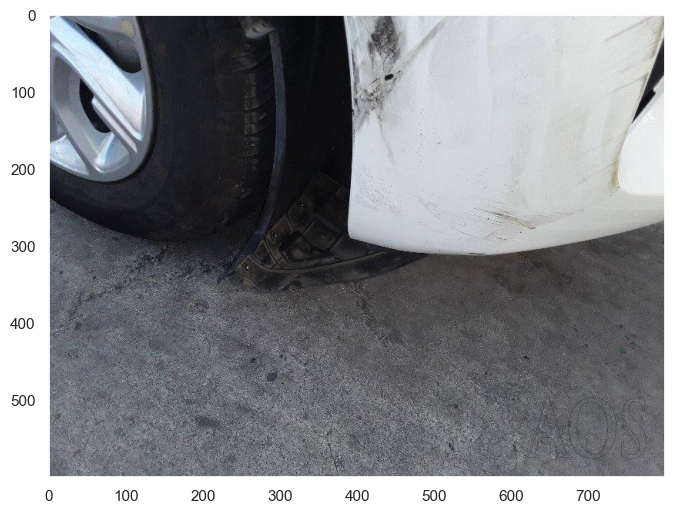

In [80]:
path = './2.Validation/1.원천데이터/damage/0506237_sc-202337.jpg'

image_pil = Image.open(path)
image = np.array(image_pil)

plt.imshow(image)
plt.grid(False)
plt.show()

## Damage class 별 갯수

<Axes: >

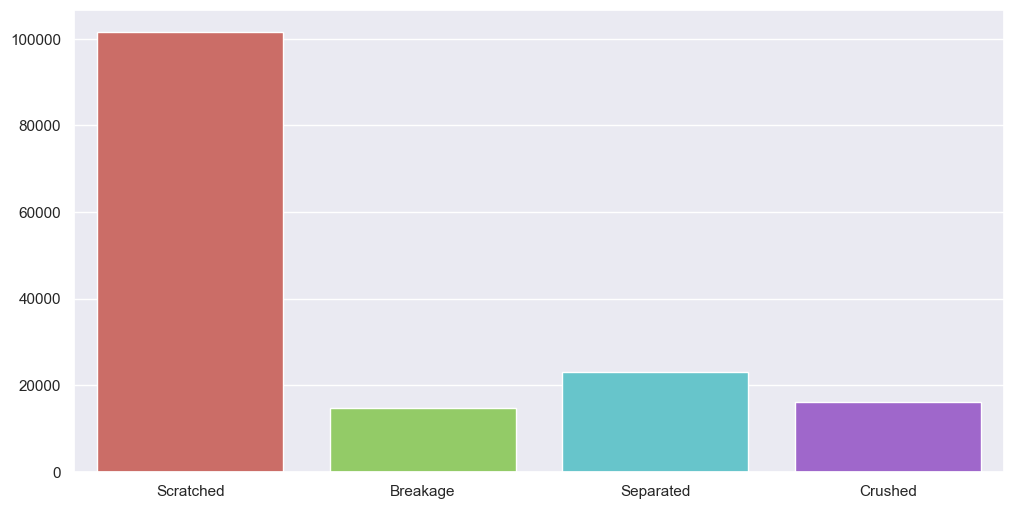

In [44]:
sns.set(rc = {'figure.figsize':(12,6)})

cm = sns.color_palette('hls', 4)
sns.barplot(
  x = ['Scratched', 'Breakage', 'Separated', 'Crushed'],
  y = [x for x in damage_df.loc["총합"][1:5]], palette=cm
)

### images
id  
width  
height  
filme_name

## annotations

id : 라벨링 식별자  
category_id : 사고아이디  
damage : 손상종류  
part : 차량부위  
level : 손상심각도(경미 손상, 소규모 손상, 대규모 손상, 교체수준)  
repair : 수리 방법

## categories 
id : 사고아이디  
supercategory_name : 차량크기